In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pandas as pd
%matplotlib inline

In [3]:
import warnings


In [4]:
warnings.filterwarnings('ignore')

In [56]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [57]:
plt.style.use('seaborn-whitegrid')

In [6]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [7]:
titanic_data = pd.read_csv('train.csv')

In [76]:
titanic_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [9]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
plt.plot()

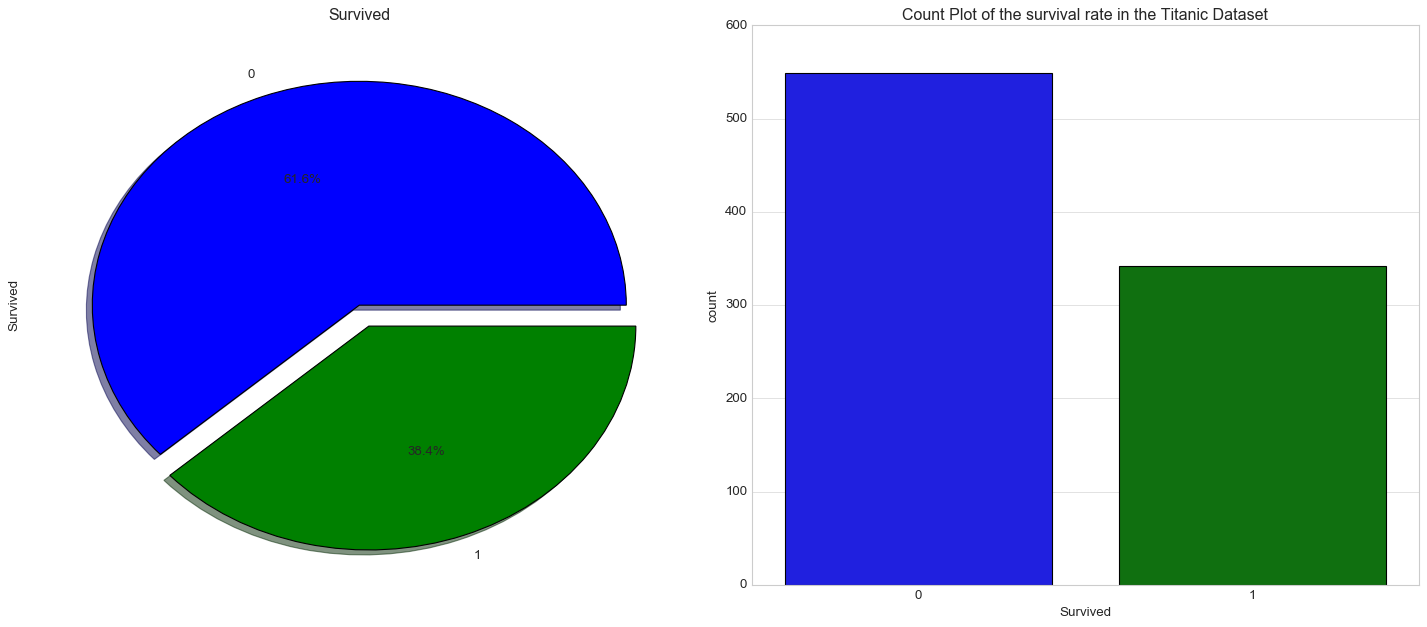

In [58]:
fig,ax = plt.subplots(nrows= 1,ncols=2,figsize=(18,8))
titanic_data['Survived'].value_counts().plot(kind='pie',explode=[0,0.1],ax=ax[0],shadow=True,autopct='%1.1f%%')
ax[0].set_title('Survived')
sns.countplot(x='Survived',data=titanic_data,ax = ax[1])
ax[1].set_title('Count Plot of the survival rate in the Titanic Dataset')
plt.tight_layout()


In [34]:
titanic_data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

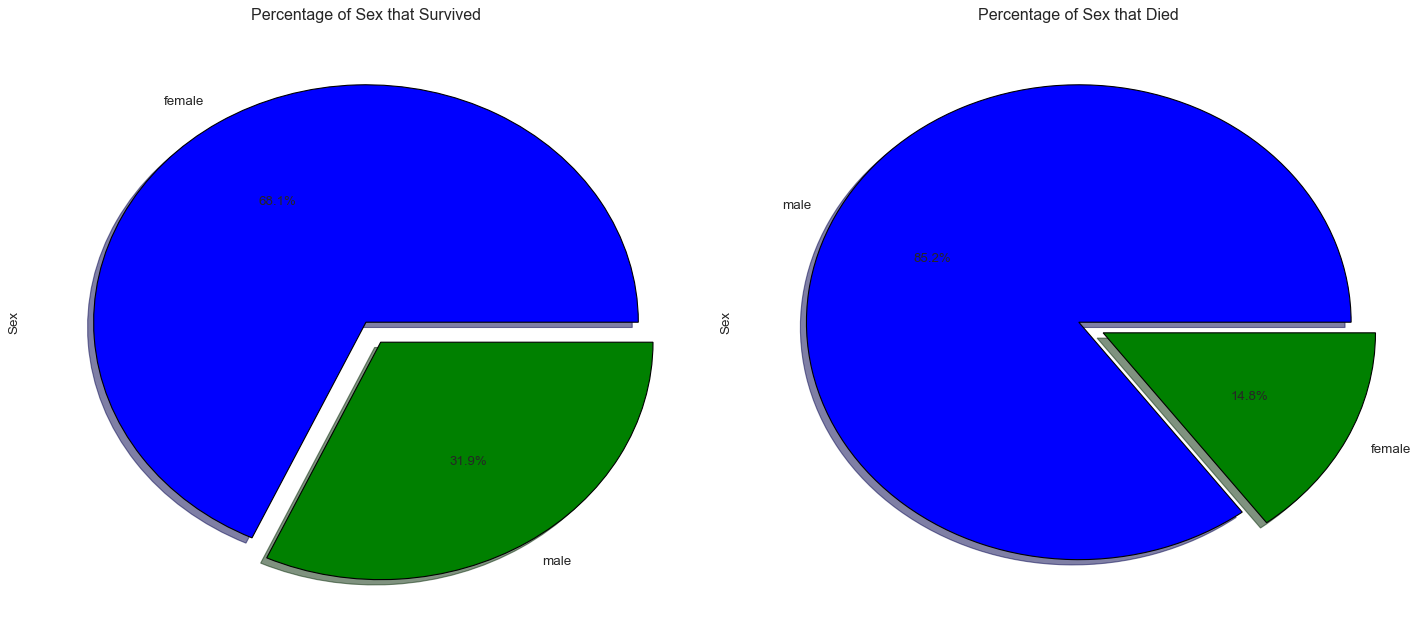

In [59]:
Survived = titanic_data[titanic_data['Survived'] == 1]['Sex'].value_counts()
Died = titanic_data[titanic_data['Survived'] == 0]['Sex'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(18,8))
Survived.plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1],shadow=True,ax=ax[0])
ax[0].set_title('Percentage of Sex that Survived')
Died.plot(kind='pie',autopct='%1.1f%%',explode=[0,0.1],shadow=True,ax=ax[1])
ax[1].set_title('Percentage of Sex that Died')
plt.tight_layout()



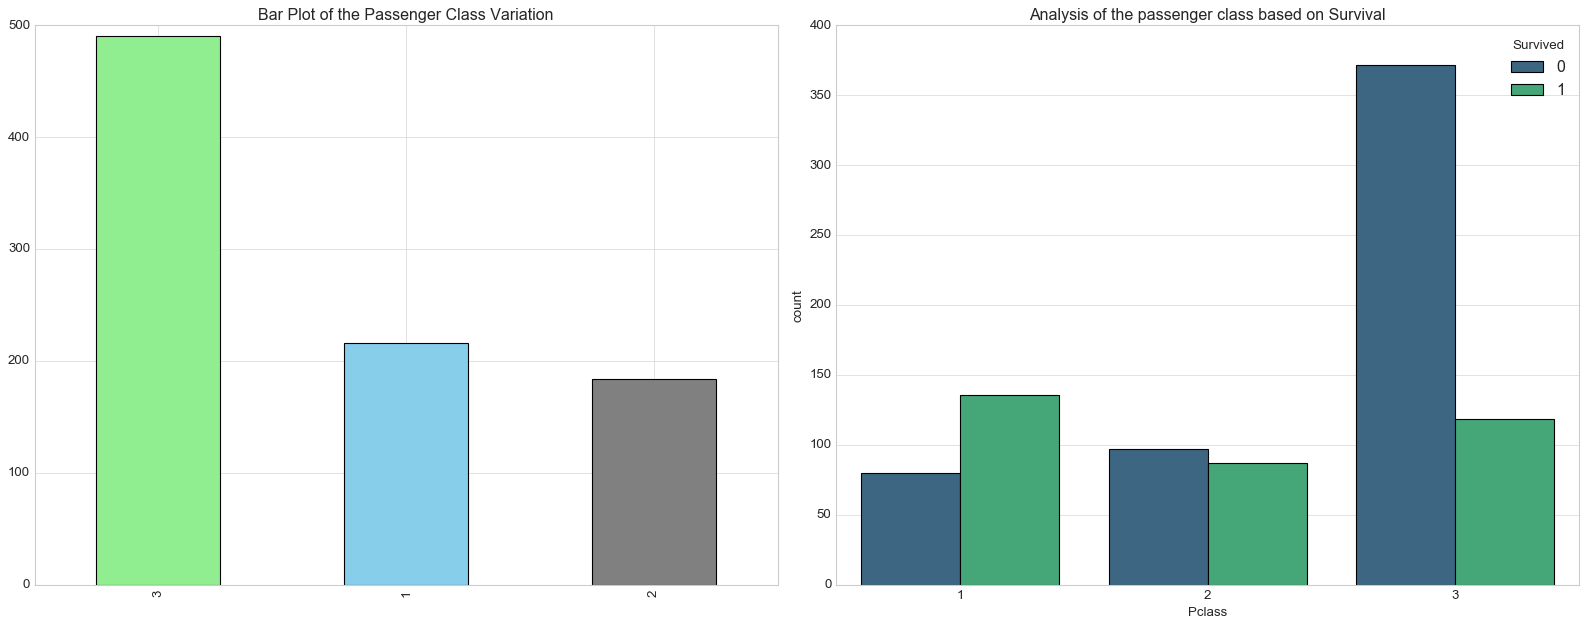

In [66]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
titanic_data['Pclass'].value_counts().plot(kind='bar',ax=ax[0],color=['lightgreen','skyblue','grey'])
ax[0].set_title('Bar Plot of the Passenger Class Variation')
sns.countplot('Pclass',hue='Survived',palette='viridis',saturation=0.75,orient='h',ax=ax[1],data=titanic_data)
ax[1].set_title('Analysis of the passenger class based on Survival')
plt.tight_layout()

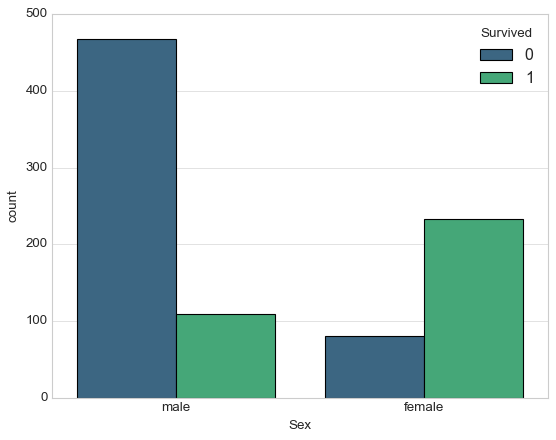

In [60]:
sns.countplot('Sex',hue='Survived',data=titanic_data,palette='viridis')

In [86]:
pd.crosstab([titanic_data.Sex,titanic_data.Survived],titanic_data.Pclass,margins=True).style.background_gradient(cmap='coolwarm')

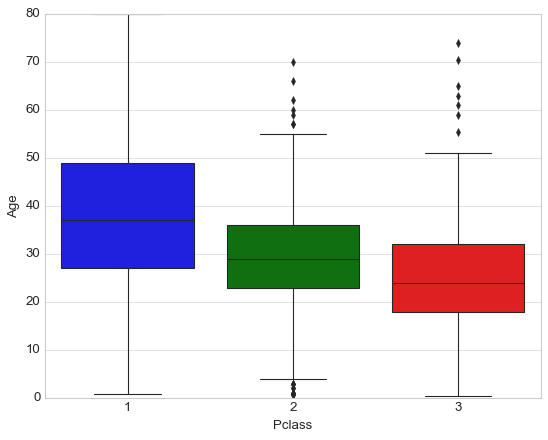

In [71]:
sns.boxplot('Pclass','Age',data=titanic_data)

In [79]:
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Pclass == 1),'Age'] = 37
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Pclass == 2),'Age'] = 28
titanic_data.loc[(titanic_data.Age.isnull()) & (titanic_data.Pclass == 3),'Age'] = 24

    

In [81]:
titanic_data.Age.isnull().any()

False

In [82]:
titanic_data.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,24.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [85]:
import math
print('The Oldest Age is :',titanic_data.Age.max(),'years old')
print('The Youngest Age is :',titanic_data.Age.min(),'years old')
print('The Average Age is :',math.ceil(titanic_data.Age.mean()),'years old')


The Oldest Age is : 80.0 years old
The Youngest Age is : 0.42 years old
The Average Age is : 30 years old


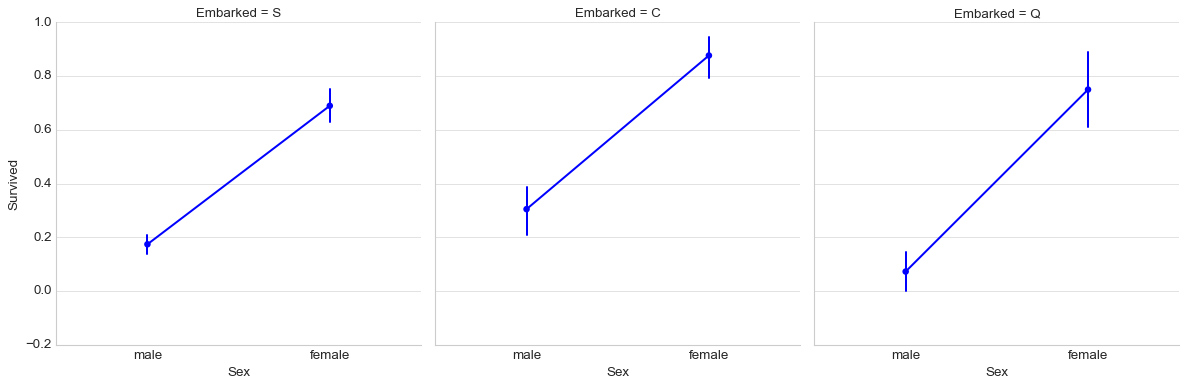

In [90]:
sns.factorplot('Sex','Survived',col='Embarked',data=titanic_data)

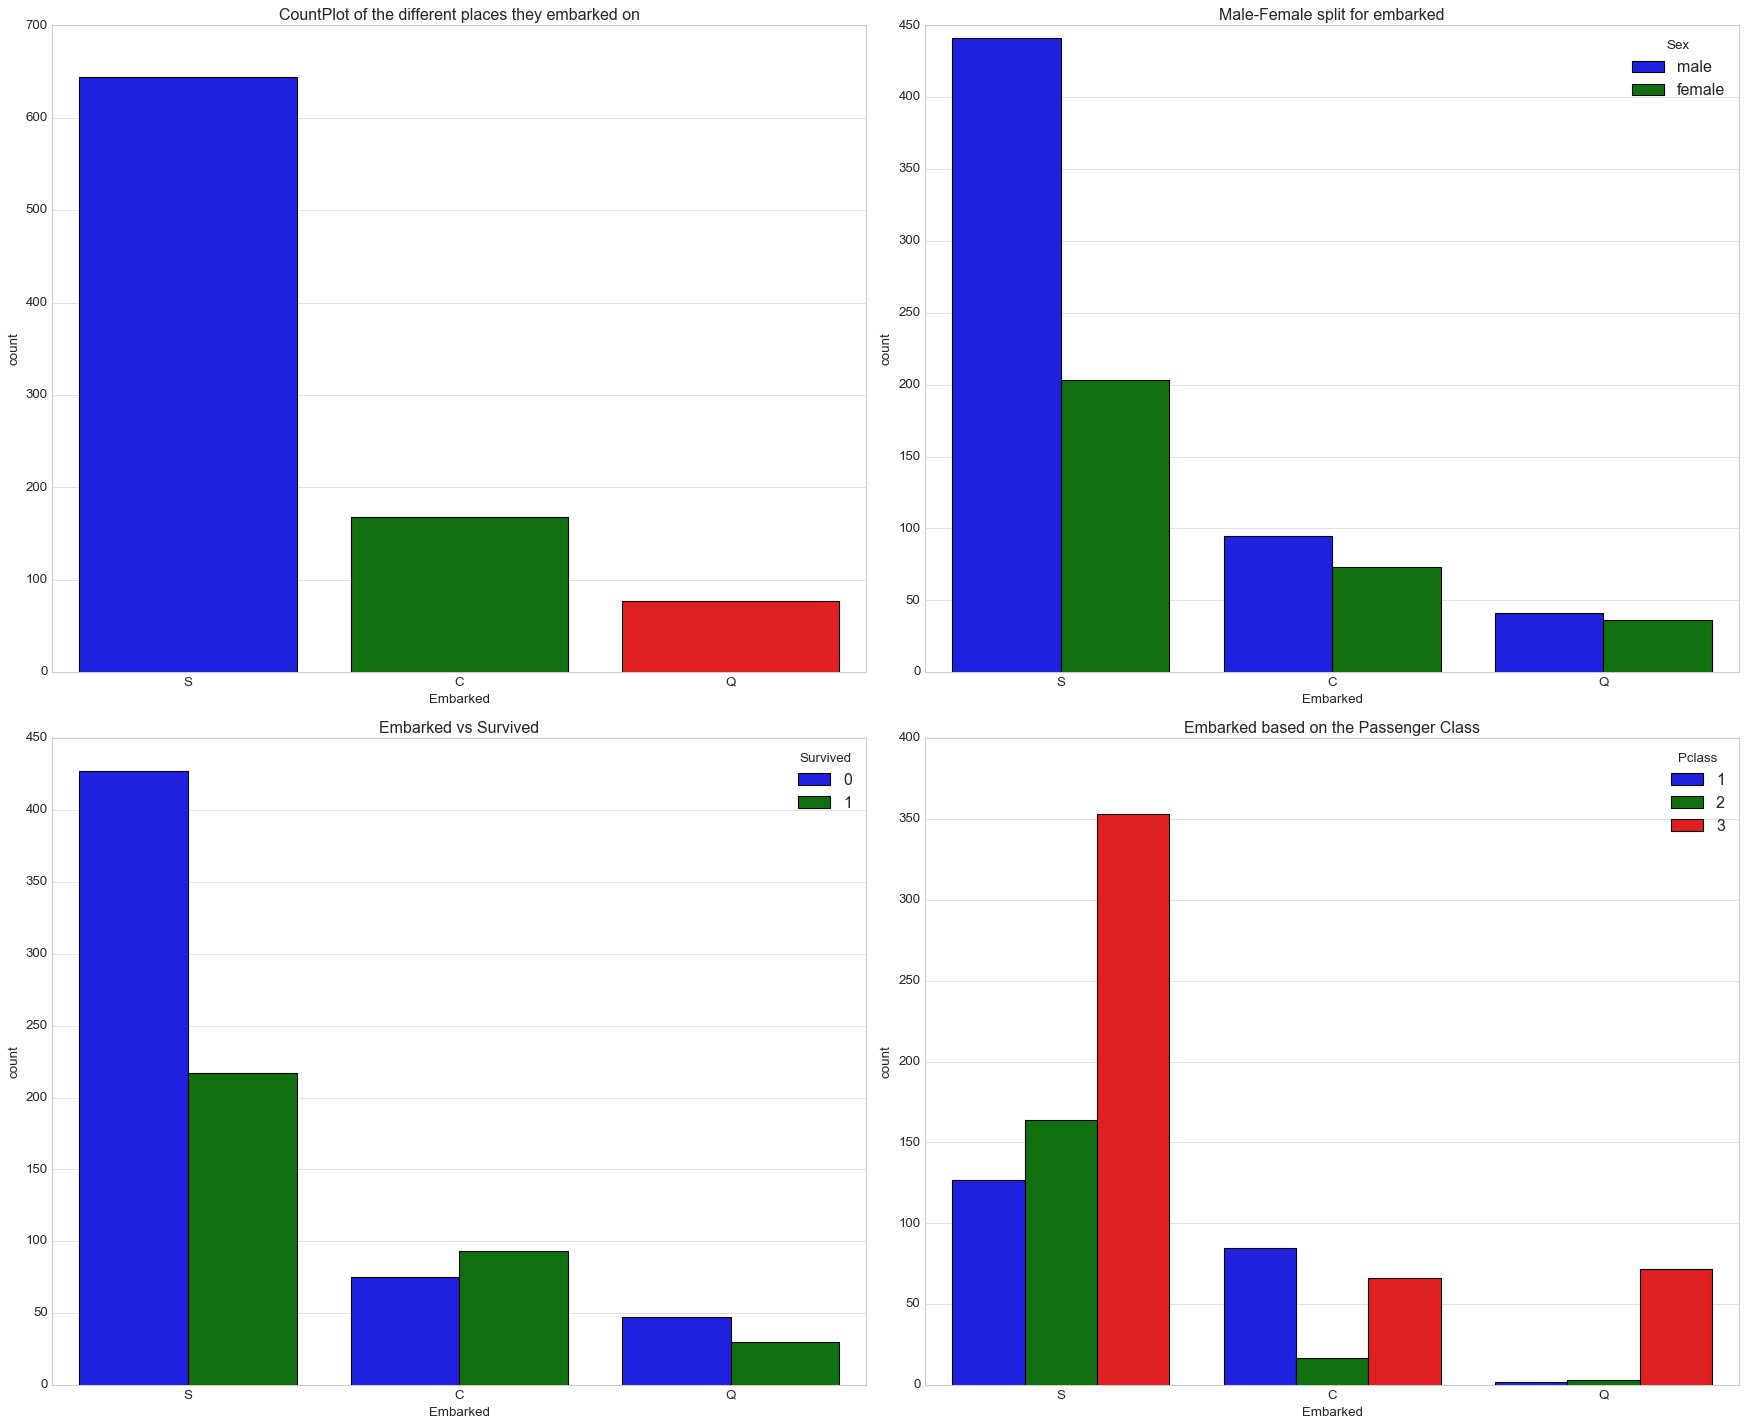

In [91]:
fig,ax = plt.subplots(2,2,figsize =(22,18))
sns.countplot('Embarked',ax=ax[0,0],data = titanic_data)
ax[0,0].set_title('CountPlot of the different places they embarked on')
sns.countplot('Embarked',ax=ax[0,1],data = titanic_data,hue='Sex')
ax[0,1].set_title('Male-Female split for embarked')
sns.countplot('Embarked',ax=ax[1,0],data = titanic_data,hue='Survived')
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',ax=ax[1,1],data = titanic_data,hue='Pclass')
ax[1,1].set_title('Embarked based on the Passenger Class')

plt.tight_layout()
plt.show()



In [102]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [100]:
titanic_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [101]:
titanic_data['Embarked'].fillna('S',inplace=True)

In [103]:
titanic_data.drop('Cabin',axis=1,inplace=True)

In [105]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [108]:
pd.crosstab([titanic_data.SibSp],titanic_data.Survived)

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


Text(0.5,1,'Pie Chart Forr passenger class')

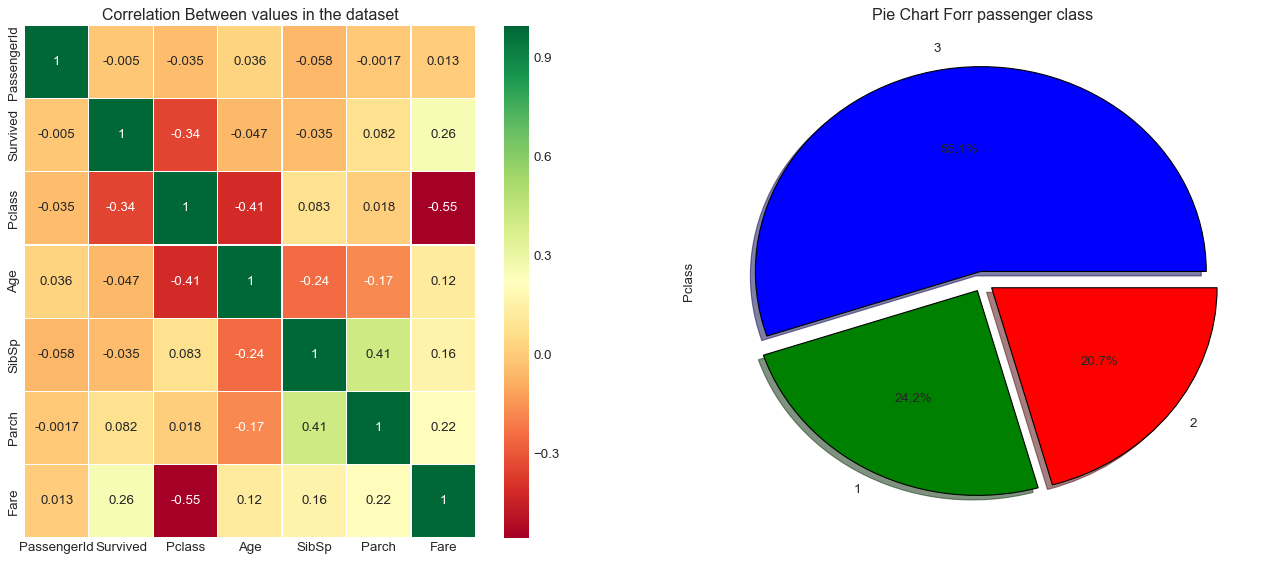

In [114]:
corr_data = titanic_data.corr()
fig,ax = plt.subplots(1,2,figsize=(20,8))
sns.heatmap(corr_data,linewidths= 0.2,cmap='RdYlGn',annot=True,ax=ax[0])
ax[0].set_title('Correlation Between values in the dataset')
titanic_data['Pclass'].value_counts().plot(kind='pie',explode=[0.05,0.05,0.05],autopct='%1.1f%%',shadow=True,ax=ax[1])
ax[1].set_title('Pie Chart Forr passenger class')



In [118]:
#Feature Engineering of The dataset
titanic_data['Sex'] = titanic_data['Sex'].map({'male':0,'female':1})

In [121]:
titanic_data['Age_Band'] = 0
titanic_data.loc[(titanic_data['Age'] <= 16),'Age_Band'] = 0
titanic_data.loc[(titanic_data['Age'] > 16) & (titanic_data['Age'] <= 32) ,'Age_Band'] = 1
titanic_data.loc[(titanic_data['Age'] > 32) & (titanic_data['Age'] <= 48) ,'Age_Band'] = 2
titanic_data.loc[(titanic_data['Age'] > 48) & (titanic_data['Age'] <= 64) ,'Age_Band'] = 3
titanic_data.loc[(titanic_data['Age'] > 64) & (titanic_data['Age'] <= 80) ,'Age_Band'] = 4



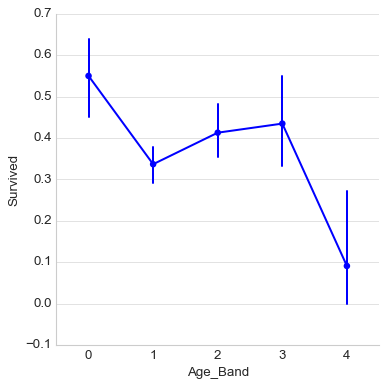

In [124]:
sns.factorplot('Age_Band','Survived',data=titanic_data)

In [134]:
titanic_data['Fare_Band'] = 0
titanic_data['Farecat'] = pd.qcut(titanic_data['Fare'],4)

In [140]:
titanic_data.groupby('Farecat').count()['Survived'].to_frame()

,Survived
Farecat,
"(-0.001, 7.91]",223
"(7.91, 14.454]",224
"(14.454, 31.0]",222
"(31.0, 512.329]",222


In [143]:
titanic_data['FareBand'] = 0
titanic_data.loc[titanic_data['Fare'] <= 7.91,'FareBand'] = 0
titanic_data.loc[(titanic_data['Fare'] > 7.91) & (titanic_data['Fare'] <= 14.454),'FareBand'] = 1
titanic_data.loc[(titanic_data['Fare'] > 14.454) & (titanic_data['Fare'] <= 31),'FareBand'] = 2
titanic_data.loc[(titanic_data['Fare'] > 31) & (titanic_data['Fare'] <= 512.329),'FareBand'] = 3



In [144]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Band,Fare_Band,Farecut,Farecat,FareBand
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1,0,"(-0.001, 7.91]","(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2,0,"(31.0, 512.329]","(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1,0,"(7.91, 14.454]","(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2,0,"(31.0, 512.329]","(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,2,0,"(7.91, 14.454]","(7.91, 14.454]",1


In [146]:
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S':0,'C':1,'Q':2})

In [147]:
titanic_data['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [148]:
titanic = titanic_data.copy()

In [178]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
Age_Band    891 non-null int64
FareBand    891 non-null int64
dtypes: int64(8)
memory usage: 55.7 KB


In [155]:
titanic.drop(['Fare_Band'],inplace=True,axis=1)

In [156]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_Band,FareBand
0,1,0,3,0,1,0,0,1,0
1,2,1,1,1,1,0,1,2,3
2,3,1,3,1,0,0,0,1,1
3,4,1,1,1,1,0,0,2,3
4,5,0,3,0,0,0,0,2,1


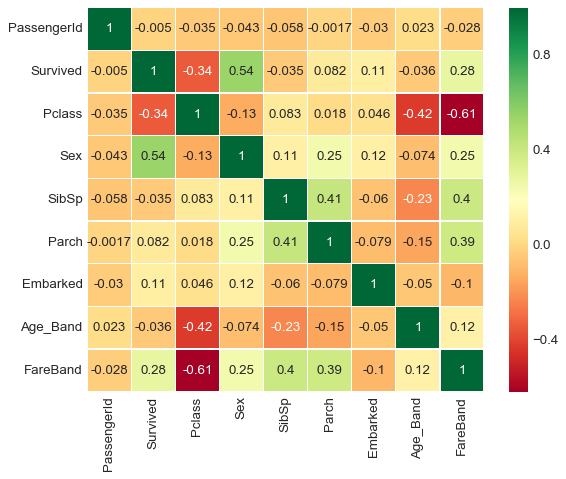

In [157]:
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr,annot=True,linewidths=0.3,cmap='RdYlGn')

<h2>PREDICTIVE MODELLING USING ML CLASSIFICATION ALGORITHMS</h2>

In [162]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [163]:
from sklearn.metrics import recall_score,accuracy_score,precision_score

In [164]:
logModel = LogisticRegression()

In [170]:
titanic.drop('PassengerId',inplace=True,axis=1)

In [180]:
train,test = train_test_split(titanic,random_state=0,test_size = 0.3,stratify=titanic['Survived'])

In [185]:
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

In [186]:
#Starting with the support vector machines Algorithm
#Using the radial support vector machines kernel
model = svm.SVC(kernel='rbf',C= 1,gamma = 0.1) #A low value for gamma implies a low bias and a high variance while a larger value implies vice-versa
#C is a parameter for soft margin cost function which controls the influence of each support vector
model.fit(train_X,train_Y)
pred_Y = model.predict(test_X)
print('The accuracy of this model is', accuracy_score(pred_Y,test_Y))



The accuracy of this model is 0.8208955223880597


In [190]:
#For linear support vector machine algorithm
#The kernel is linear instead of rbf
linear_svm = svm.SVC(kernel= 'linear',C = 0.1,gamma = 0.1)
#To fit this model :-
linear_svm.fit(train_X,train_Y)
pred2_Y = linear_svm.predict(test_X)
print('The accuracy of this Linear SVM Model is', accuracy_score(pred2_Y,test_Y))

The accuracy of this Linear SVM Model is 0.7910447761194029


In [196]:
metrics = pd.DataFrame(columns =['Accuracy_Score','Precision_Score','Recall_Score'],index=['LogisticRegression','Linear_SVM','Radial_SVM','DecisionTree','KNN','Naive_Bayes','Random_Forests'])

In [212]:
metrics.loc['Linear_SVM','Accuracy_Score'] = accuracy_score(pred2_Y,test_Y)
metrics.loc['Linear_SVM','Precision_Score'] = precision_score(pred2_Y,test_Y)
metrics.loc['Linear_SVM','Recall_Score'] = recall_score(pred2_Y,test_Y)

metrics.loc['Radial_SVM','Accuracy_Score'] = accuracy_score(pred_Y,test_Y)
metrics.loc['Radial_SVM','Precision_Score'] = precision_score(pred_Y,test_Y)
metrics.loc['Radial_SVM','Recall_Score'] = recall_score(pred_Y,test_Y)

In [198]:
metrics

,Accuracy_Score,Precision_Score,Recall_Score
LogisticRegression,NaN,NaN,NaN
Linear_SVM,0.820896,0.679612,0.823529
Radial_SVM,NaN,NaN,NaN
DecisionTree,NaN,NaN,NaN
KNN,NaN,NaN,NaN
Naive_Bayes,NaN,NaN,NaN
Random_Forests,NaN,NaN,NaN


In [199]:
#For Logistic Regression :-
logModel = LogisticRegression()
logModel.fit(train_X,train_Y)
lr_pred = logModel.predict(test_X)
print('The accuracy score of the Logistic Regression algorithm is',accuracy_score(lr_pred,test_Y))

The accuracy score of the Logistic Regression algorithm is 0.7985074626865671


In [200]:
metrics.loc['LogisticRegression','Accuracy_Score'] = accuracy_score(lr_pred,test_Y)
metrics.loc['LogisticRegression','Precision_Score'] = precision_score(lr_pred,test_Y)
metrics.loc['LogisticRegression','Recall_Score'] = recall_score(lr_pred,test_Y)

In [203]:
#For KNearestNeighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_X,train_Y)
k_pred = knn.predict(test_X)
print('The Accuracy of the knn model is', accuracy_score(k_pred,test_Y))

The Accuracy of the knn model is 0.8022388059701493


In [209]:
#Since the accuracy_score varies with the n_neighbors, we are going get the maximum accuracy_score using a for loop to iterate through n_neighbors from 1 to 11
a = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_X,train_Y)
    k_pred = knn.predict(test_X)
    a.append(accuracy_score(k_pred,test_Y))
print('The Maximum accuracy of this model is', max(a))

The Maximum accuracy of this model is 0.8097014925373134


In [215]:
metrics.loc['KNN','Accuracy_Score'] = accuracy_score(k_pred,test_Y)
metrics.loc['KNN','Precision_Score'] = precision_score(k_pred,test_Y)
metrics.loc['KNN','Recall_Score'] = recall_score(k_pred,test_Y)

In [218]:
metrics

,Accuracy_Score,Precision_Score,Recall_Score
LogisticRegression,0.798507,0.699029,0.757895
Linear_SVM,0.791045,0.68932,0.747368
Radial_SVM,0.820896,0.679612,0.823529
DecisionTree,NaN,NaN,NaN
KNN,0.809701,0.631068,0.833333
Naive_Bayes,0.776119,0.815534,0.672
Random_Forests,NaN,NaN,NaN


In [214]:
#For the naive_bayes algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(train_X,train_Y)
nb_pred = nb.predict(test_X)
print('The accuracy of this model is', accuracy_score(nb_pred,test_Y))

The accuracy of this model is 0.7761194029850746


In [217]:
metrics.loc['Naive_Bayes','Accuracy_Score'] = accuracy_score(nb_pred,test_Y)
metrics.loc['Naive_Bayes','Precision_Score'] = precision_score(nb_pred,test_Y)
metrics.loc['Naive_Bayes','Recall_Score'] = recall_score(nb_pred,test_Y)

In [219]:
#For Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(train_X,train_Y)
tree_pred = tree.predict(test_X)
print('The accuracy of this model is', accuracy_score(tree_pred,test_Y))

The accuracy of this model is 0.7798507462686567


In [220]:
metrics.loc['DecisionTree','Accuracy_Score'] = accuracy_score(tree_pred,test_Y)
metrics.loc['DecisionTree','Precision_Score'] = precision_score(tree_pred,test_Y)
metrics.loc['DecisionTree','Recall_Score'] = recall_score(tree_pred,test_Y)

In [222]:
#For the random forests algorithm
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(train_X,train_Y)
rfc_pred = rfc.predict(test_X)
print('The accuracy of this model is', accuracy_score(rfc_pred,test_Y))


The accuracy of this model is 0.8059701492537313


In [225]:
metrics

,Accuracy_Score,Precision_Score,Recall_Score
LogisticRegression,0.798507,0.699029,0.757895
Linear_SVM,0.791045,0.68932,0.747368
Radial_SVM,0.820896,0.679612,0.823529
DecisionTree,0.779851,0.631068,0.755814
KNN,0.809701,0.631068,0.833333
Naive_Bayes,0.776119,0.815534,0.672
Random_Forests,0.80597,0.660194,0.8


In [224]:
metrics.loc['Random_Forests','Accuracy_Score'] = accuracy_score(rfc_pred,test_Y)
metrics.loc['Random_Forests','Precision_Score'] = precision_score(rfc_pred,test_Y)
metrics.loc['Random_Forests','Recall_Score'] = recall_score(rfc_pred,test_Y)

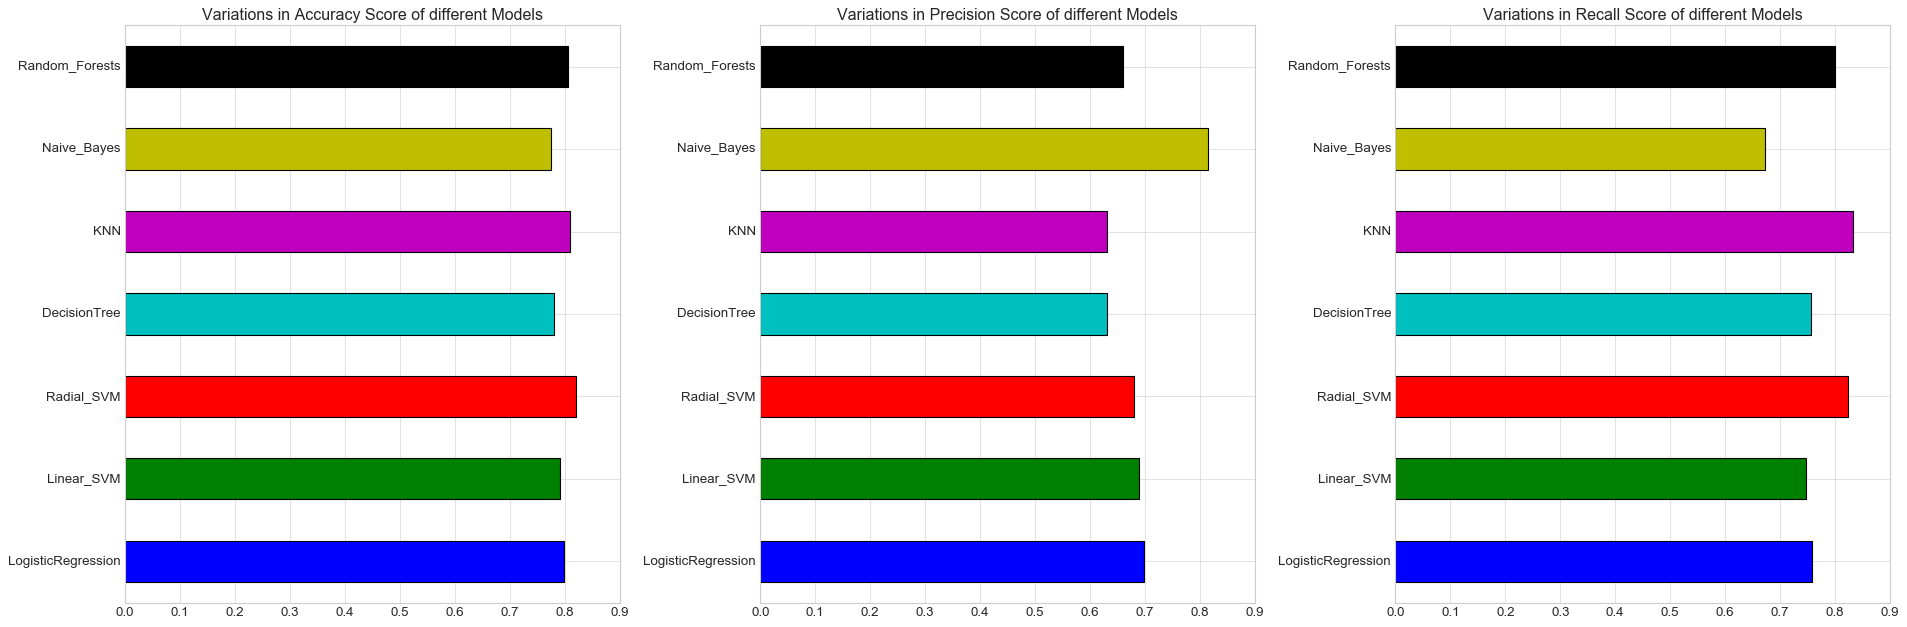

In [232]:
fig,ax = plt.subplots(1,3,figsize=(24,8))
metrics['Accuracy_Score'].plot.barh(ax = ax[0])
ax[0].set_title('Variations in Accuracy Score of different Models')
metrics['Precision_Score'].plot.barh(ax = ax[1])
ax[1].set_title('Variations in Precision Score of different Models')
metrics['Recall_Score'].plot.barh(ax = ax[2])
ax[2].set_title('Variations in Recall Score of different Models')

plt.tight_layout()
plt.show()



In [250]:
print('The percentage of people that died is',titanic[titanic['Survived']== 0]['Survived'].count()*100 /len(titanic))

The percentage of people that died is 61.61616161616162
